In [3]:
import numpy as np 
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns 
import json
import pandas as pd
from pathlib import Path 

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

Path('../results/figures').mkdir(parents=True, exist_ok=True)

print("✔️ Imports completed!")

✔️ Imports completed!


In [4]:
with open('../results/baseline_results.json', 'r') as f:
    baseline_results = json.load(f)

with open('../results/multiquery_results.json', 'r') as f:
    mq_results = json.load(f)

print("Baseline (Standard Attention) results:")
print(json.dumps(baseline_results, indent=2))

print("\nMulti-Query Attention Results:")
print(json.dumps(mq_results, indent=2))

Baseline (Standard Attention) results:
{
  "model": "Standard Vision Transformer",
  "avg_error_pixels": 0.13387457425497015,
  "accuracy_percent": 100.0,
  "fps": 1375.1545871228764,
  "latency_ms": 0.7271909713745117,
  "num_parameters": 208418,
  "train_loss_final": 0.011222243264925724,
  "val_loss_final": 0.011568224380636156
}

Multi-Query Attention Results:
{
  "model": "Multi-Query Vision Transformer",
  "avg_error_pixels": 0.23999095026327638,
  "accuracy_percejt": 100.0,
  "fps": 1224.439131335955,
  "latency_ms": 0.8167004585266113,
  "num_parameters": 183458,
  "train_loss_final": 0.07507299403450927,
  "val_loss_final": 0.038015642394508914
}


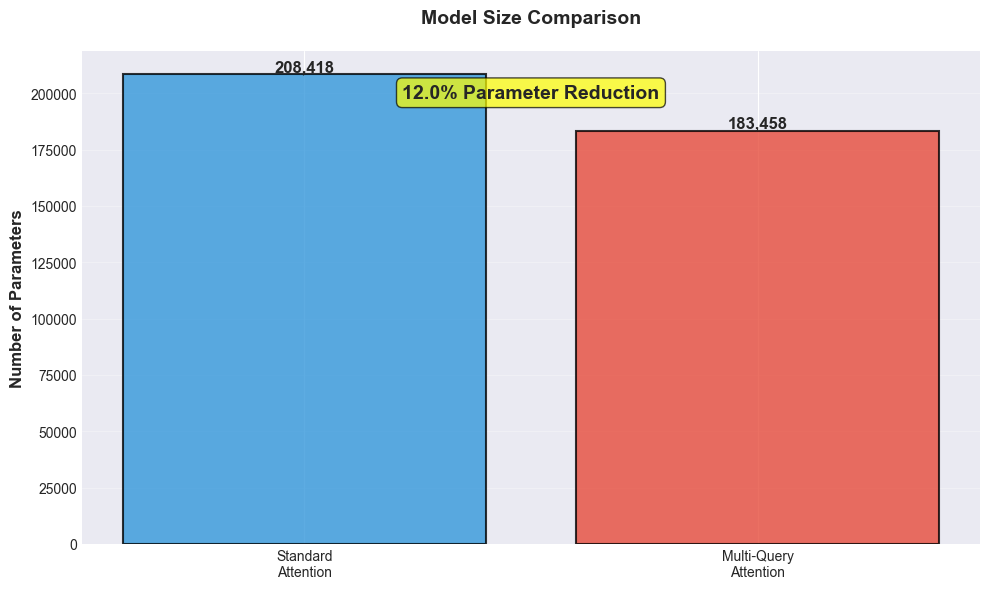

✔️ Parameter comparison chart saved!


In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

models = ['Standard\nAttention', 'Multi-Query\nAttention']
params = [baseline_results['num_parameters'], mq_results['num_parameters']]
colors = ['#3498db', '#e74c3c']

bars = ax.bar(models, params, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

for bar in bars: 
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
    f'{int(height):,}', 
    ha='center', va='bottom', fontsize=12, fontweight='bold')

param_reduction = (1 - params[1]/params[0]) * 100
ax.text(0.5, max(params) * 0.95,
        f'{param_reduction:.1f}% Parameter Reduction',
        ha='center', fontsize=14, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
ax.set_ylabel('Number of Parameters', fontsize=12, fontweight='bold')
ax.set_title('Model Size Comparison', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/parameter_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✔️ Parameter comparison chart saved!")


In [ ]:
fig, ax = plt.subplots(figsize(20, 6))

models = ["standard\nAttention', 'Multi_query\nAttention']
fps_values = [baseline_results['fps'], mq_results['fps']]
colors = ['#3498db', '#e74c3c']

bars = ax.bar(models, fps_values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, 
            f'{height:.1f} FPS',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

fps_improvement = ((fps_values[1] - fps_values[0[) / fps_values[0]) * 100
improvment_color = 'green' if fps_improvement > 0 else 'red'
ax.text(0.5, mac(fps_values) * 0.95, 
        f'{fps_improvement:+.1f}%Speed Change',
        ha='center', fontsize=14, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor=improvement_color, alpha=0.5))

ax.set_ylabel('Frames Per Second(FPS)', fontsize=12, fontweight='bold')
ax.set_title("Inference Speed Comparison', fontsize=14, fontweight='bold, pad=20)

plt.tight_layout()
plt.savefig('../results/figures/fps_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✔️ FPS comparison chart saved!")
             